In [1]:
import numpy as np
import pandas as pd 
import datetime as dt 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('Data/2017_Yellow_Taxi_Trip_Data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [13]:
df.size

408582

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [9]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


In [16]:
df.sort_values(by = ['trip_distance']).reset_index().head(12)

,index,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,22026,63642923,1,2017-07-27 07:44:24,2017-07-27 07:44:24,1,0.0,1,N,41,264,2,10.5,0.0,0.5,0.00,0.0,0.3,11.30
1,795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.0,1,N,246,264,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
2,6908,24162045,2,2017-03-26 02:07:08,2017-03-26 02:07:12,1,0.0,5,N,61,61,1,18.0,0.0,0.0,2.00,0.0,0.3,20.30
3,13561,14504365,1,2017-02-23 16:06:31,2017-02-23 16:06:54,2,0.0,5,N,175,175,3,32.0,0.0,0.0,0.00,0.0,0.3,32.30
4,12238,95544923,1,2017-11-11 09:28:13,2017-11-11 09:28:27,2,0.0,1,N,145,145,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
5,6878,69466211,2,2017-08-17 04:06:26,2017-08-17 04:06:29,4,0.0,5,N,100,100,1,98.5,0.0,0.5,0.00,0.0,0.3,99.30
6,14372,108639975,1,2017-12-22 13:39:55,2017-12-22 13:44:23,1,0.0,1,N,226,226,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30
7,20638,106367018,1,2017-12-15 16:09:43,2017-12-15 16:09:43,1,0.0,1,N,43,264,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30
8,920,92102517,2,2017-10-31 20:29:53,2017-10-31 20:30:27,1,0.0,1,N,50,50,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
9,16263,5716905,1,2017-01-27 20:58:29,2017-01-27 20:58:50,1,0.0,1,N,249,249,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


**The Data is bit strange. Some data points have Trip distance is zero but the fair amount is non-zero. There can be outliers or maybe not. We can have many other reasons for that. Lets find out together.**

In [18]:
df.sort_values(by = ['trip_distance'], ascending=False).reset_index().head(12)

,index,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
1,13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
2,6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
3,10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
4,29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
5,18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
6,5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
7,15350,77309977,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
8,10302,43431843,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
9,2592,51094874,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


**33.96 kms... Interesting**

In [17]:
df.sort_values(by = ['fare_amount']).reset_index().head(12)

,index,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3
1,11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3
2,20698,14668209,2,2017-02-24 00:38:17,2017-02-24 00:42:05,1,0.70,1,N,65,25,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
3,14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3
4,17602,24690146,2,2017-03-24 19:31:13,2017-03-24 19:34:49,1,0.46,1,N,87,45,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8
5,5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
6,20317,75926915,2,2017-09-09 22:59:51,2017-09-09 23:02:06,1,0.24,1,N,116,116,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
7,8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
8,18565,43859760,2,2017-05-22 15:51:20,2017-05-22 15:52:22,1,0.10,1,N,230,163,3,-3.0,0.0,-0.5,0.0,0.0,-0.3,-3.8
9,4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3


**Some trip fare values are negative integer, which should make spectical about the these data points**

In [19]:
df.sort_values(by = ['fare_amount'], ascending=False).reset_index().head(12)

,index,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
1,20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
2,13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
3,15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
4,12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
5,3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
6,9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
7,16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
8,10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
9,11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82


**Some entries doesnt show the right correlation like 2 row entry shows 2 passengers traveled 0 kms and paid $450.**

## Detecting outliers

1. **Trip Distance**

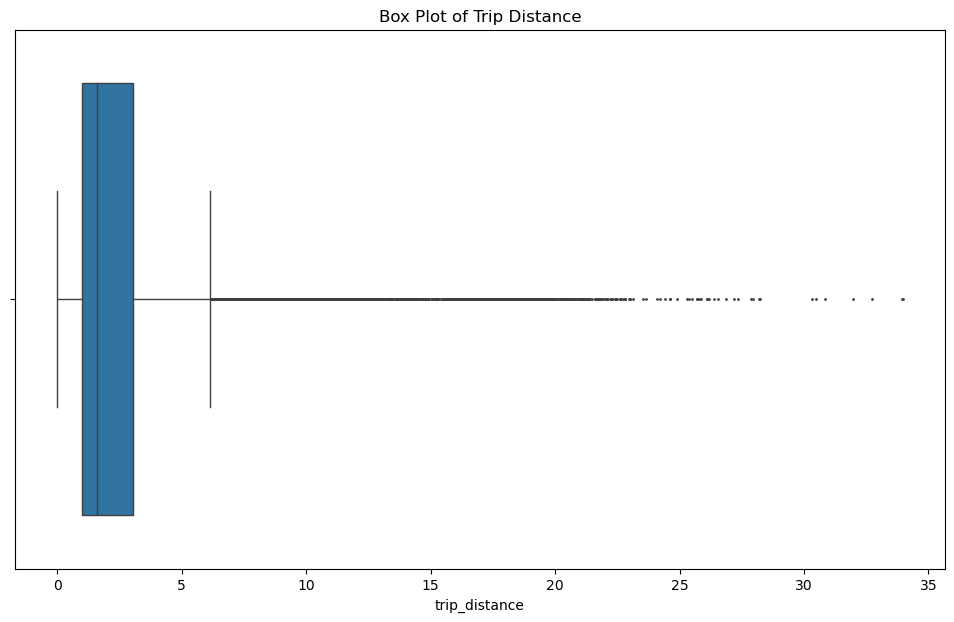

In [54]:
plt.figure(figsize=(12,7))
sns.boxplot(data = None, x = df['trip_distance'], fliersize=1)
plt.title("Box Plot of Trip Distance")
plt.show()

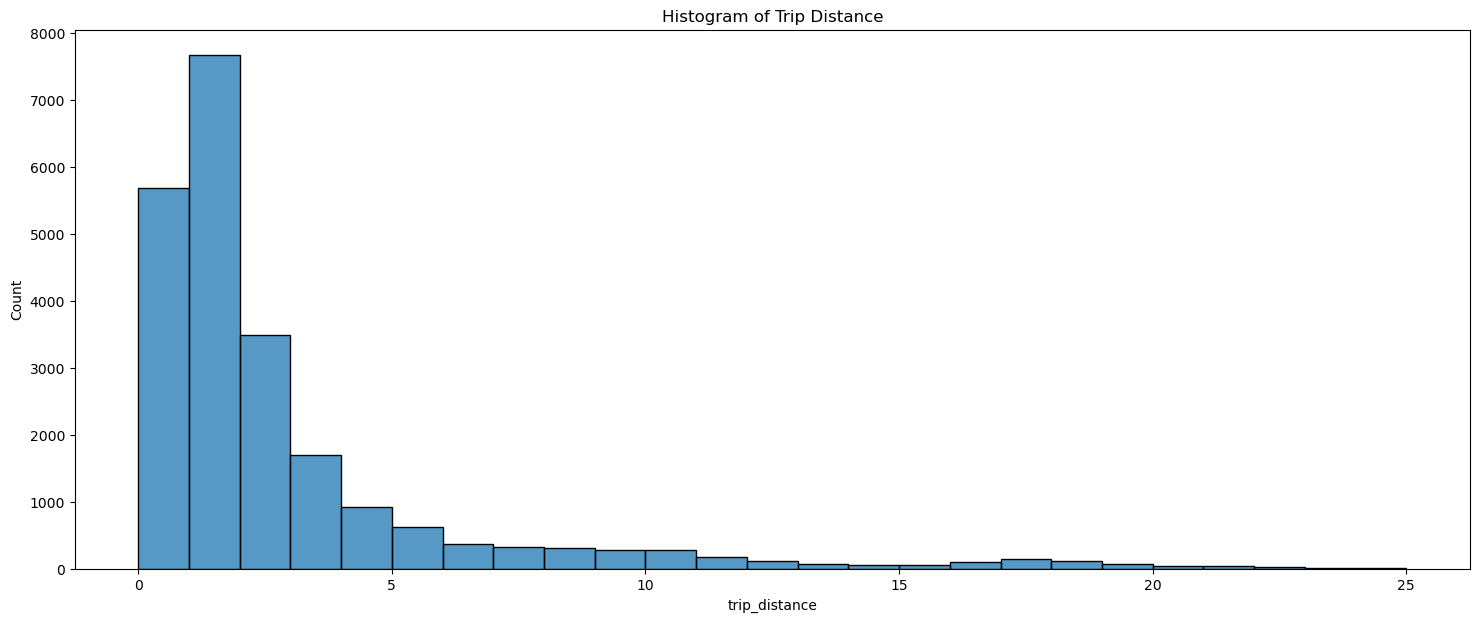

In [87]:
plt.figure(figsize=(18,7))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title("Histogram of Trip Distance")
plt.show()

**Distribution of data is right skewed**

2. **Total Amount**

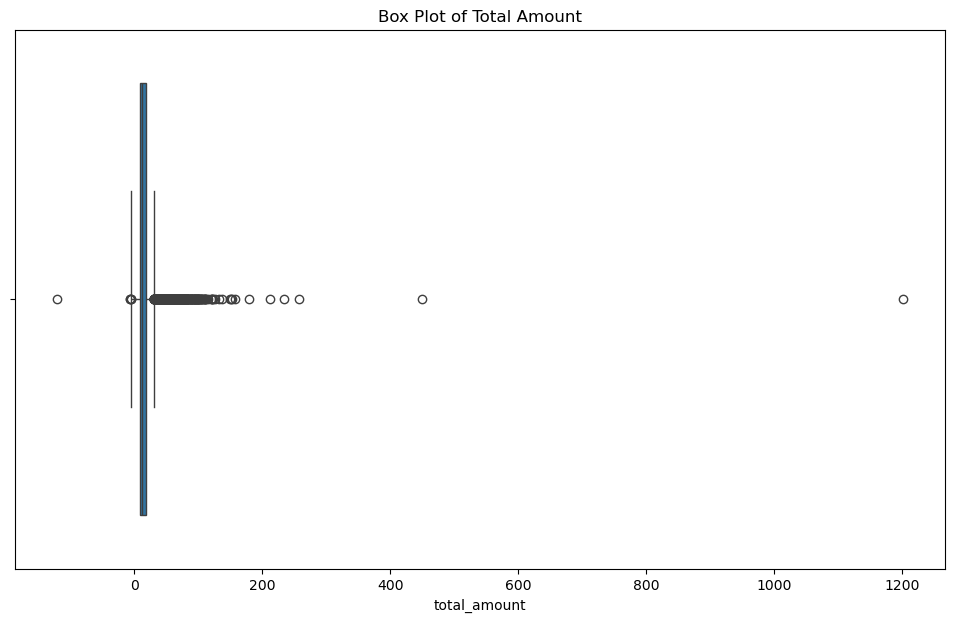

In [59]:
plt.figure(figsize=(12,7))
sns.boxplot(data = None, x = df['total_amount'])
plt.title("Box Plot of Total Amount")
plt.show()

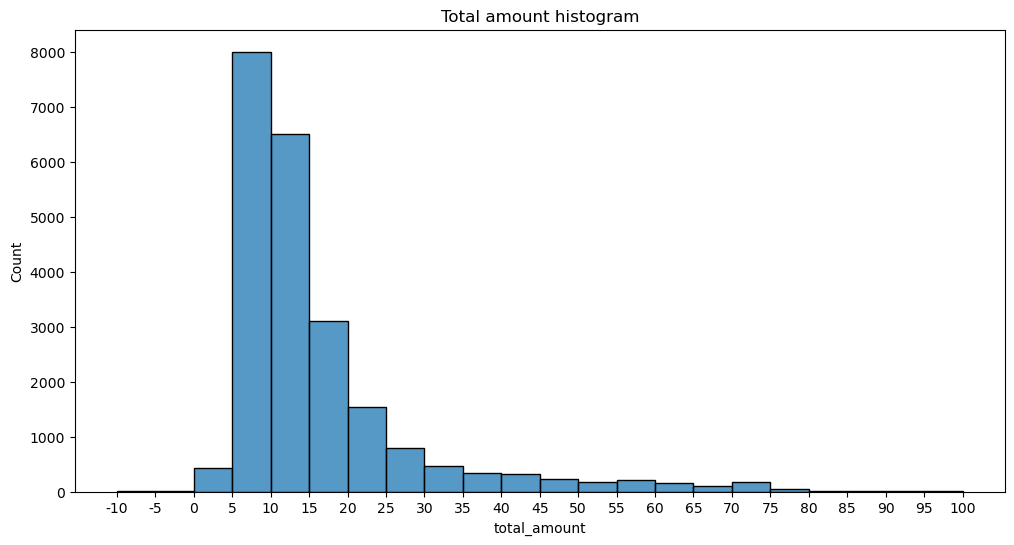

In [60]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

3. **Tip Amount**

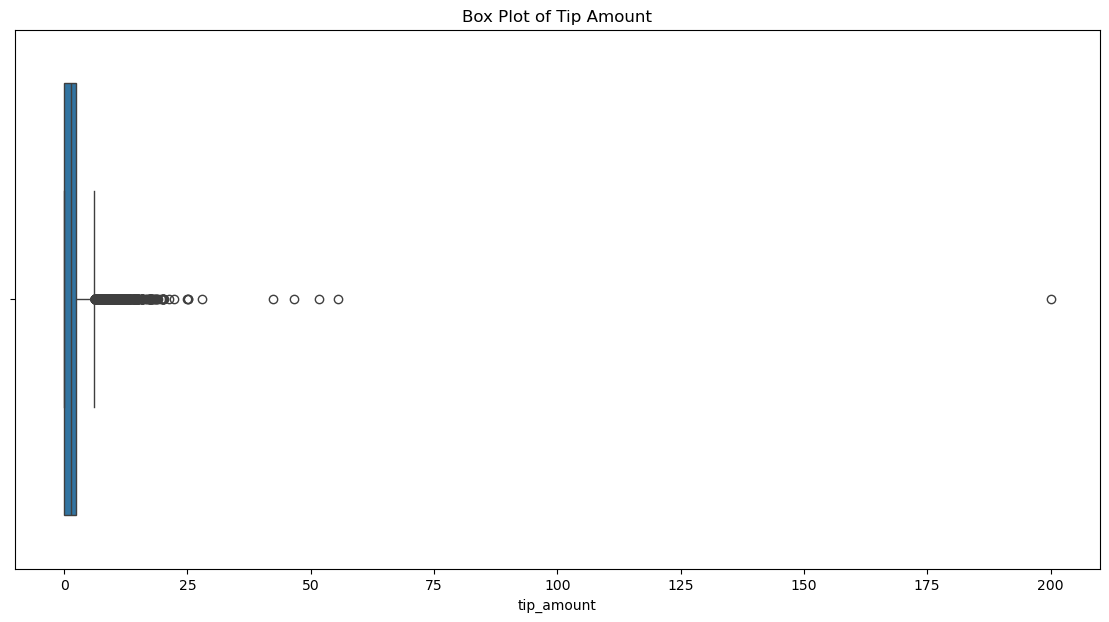

In [88]:
plt.figure(figsize=(14,7))
sns.boxplot(data = None, x = df['tip_amount'])
plt.title("Box Plot of Tip Amount")
plt.show()

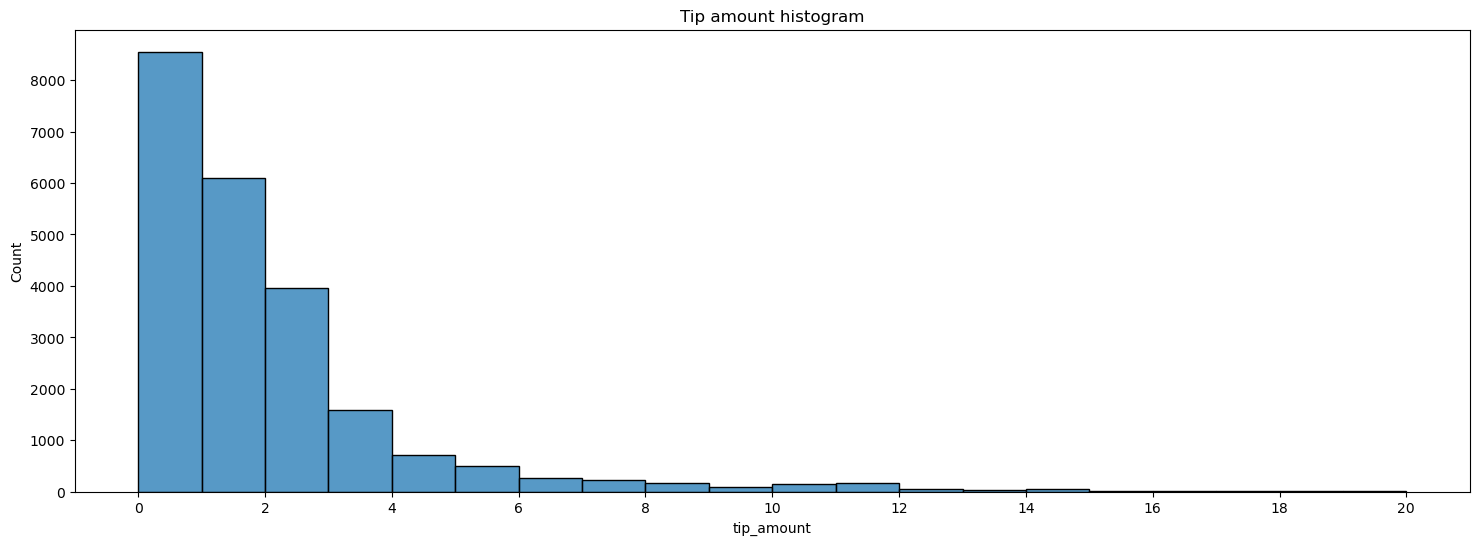

In [89]:
plt.figure(figsize=(18,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

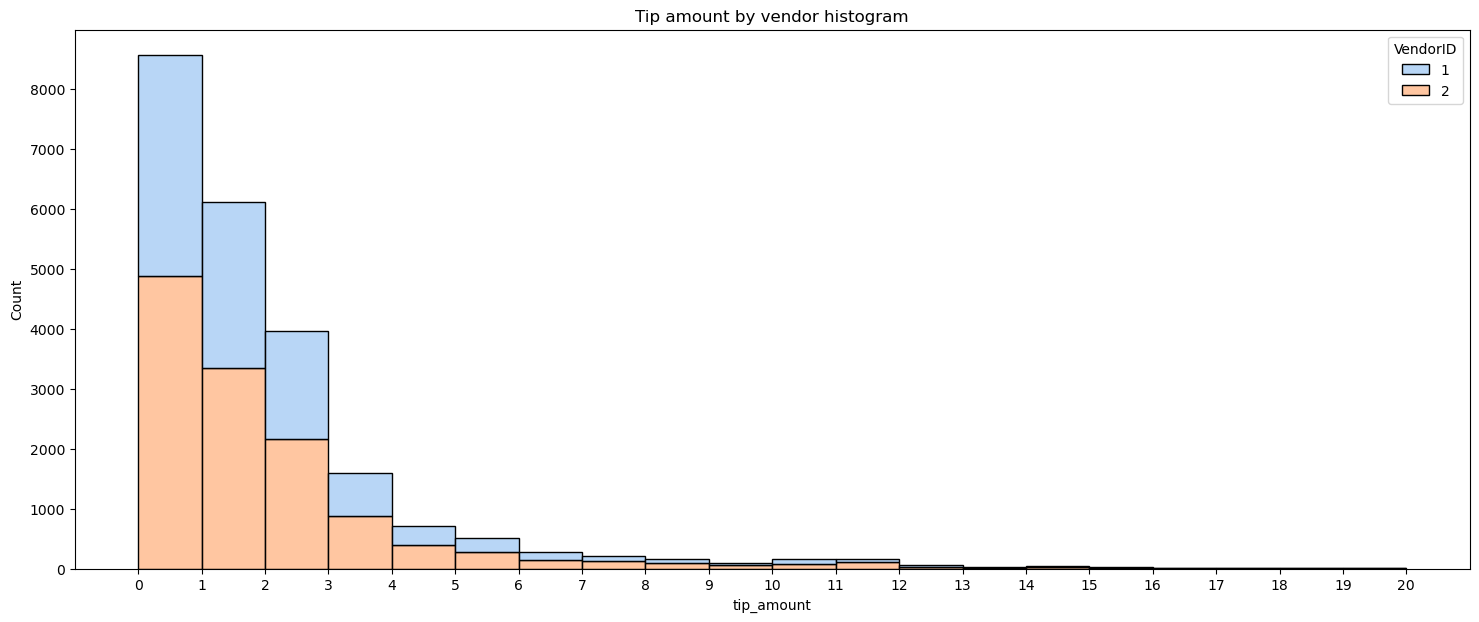

In [90]:
plt.figure(figsize=(18,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

In [66]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [68]:
mean_tips_by_passenger_count = df.groupby('passenger_count')[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


C:\Users\asada\AppData\Local\Temp\ipykernel_1752\251314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\asada\AppData\Local\Temp\ipykernel_1752\251314.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


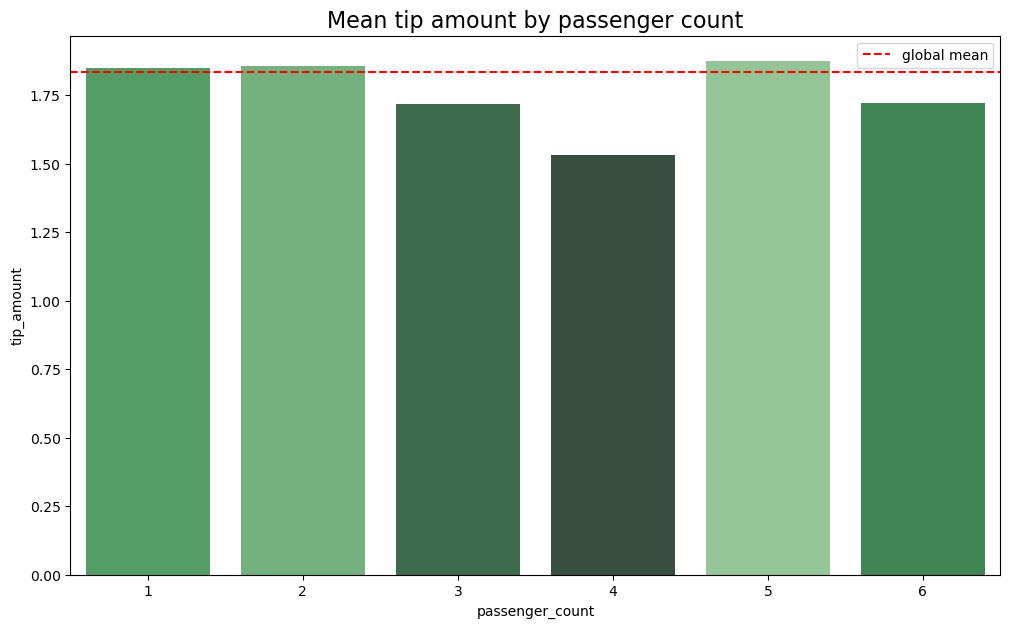

In [69]:
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

In [70]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [71]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [72]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [73]:
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

C:\Users\asada\AppData\Local\Temp\ipykernel_1752\277831587.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


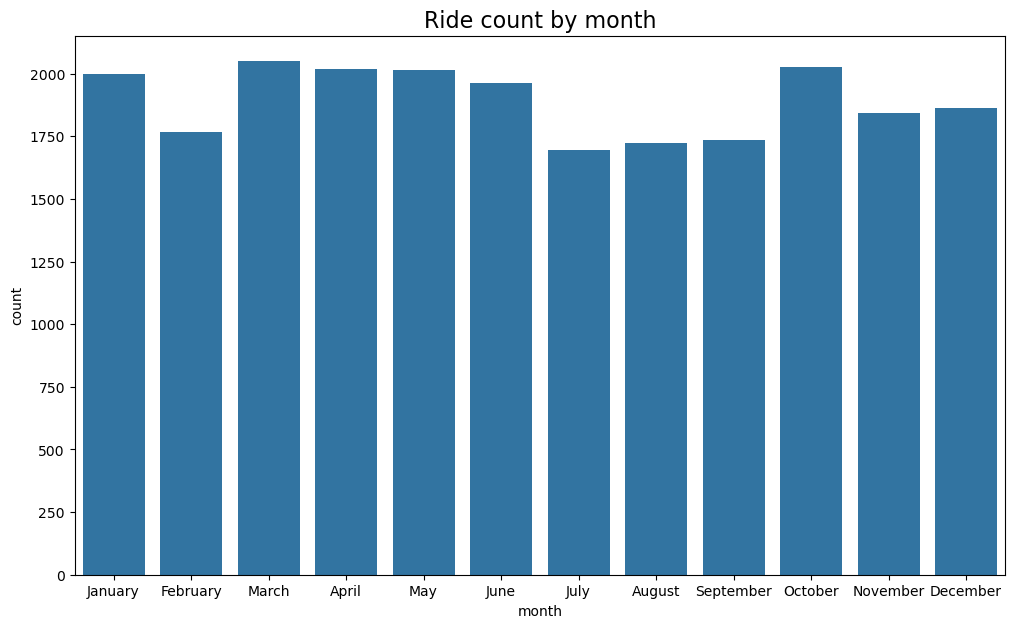

In [74]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

In [75]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\asada\AppData\Local\Temp\ipykernel_1752\2110152418.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


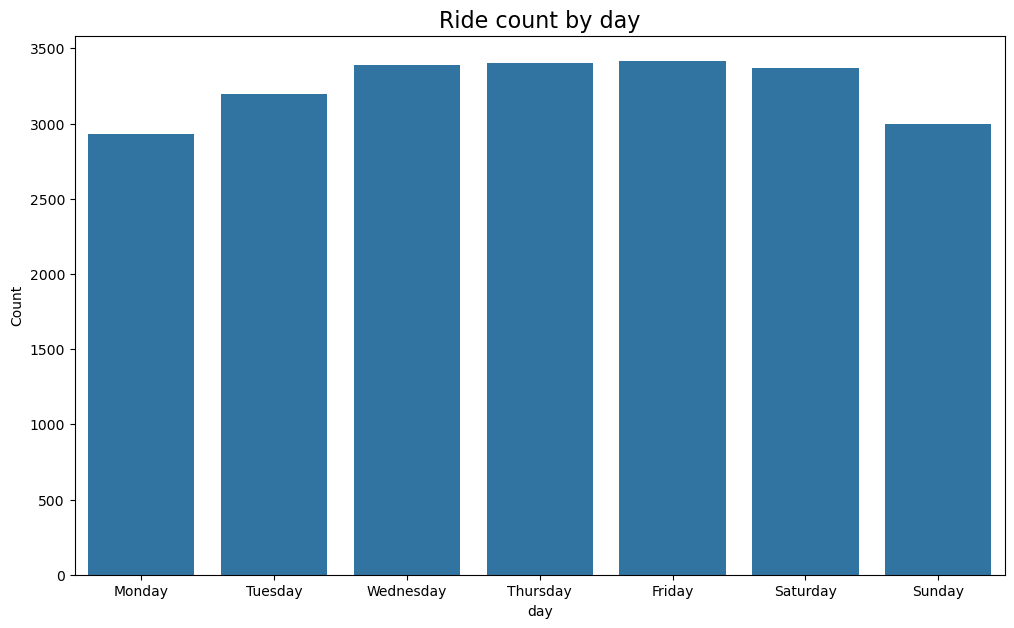

In [76]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

In [78]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


C:\Users\asada\AppData\Local\Temp\ipykernel_1752\3340445493.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


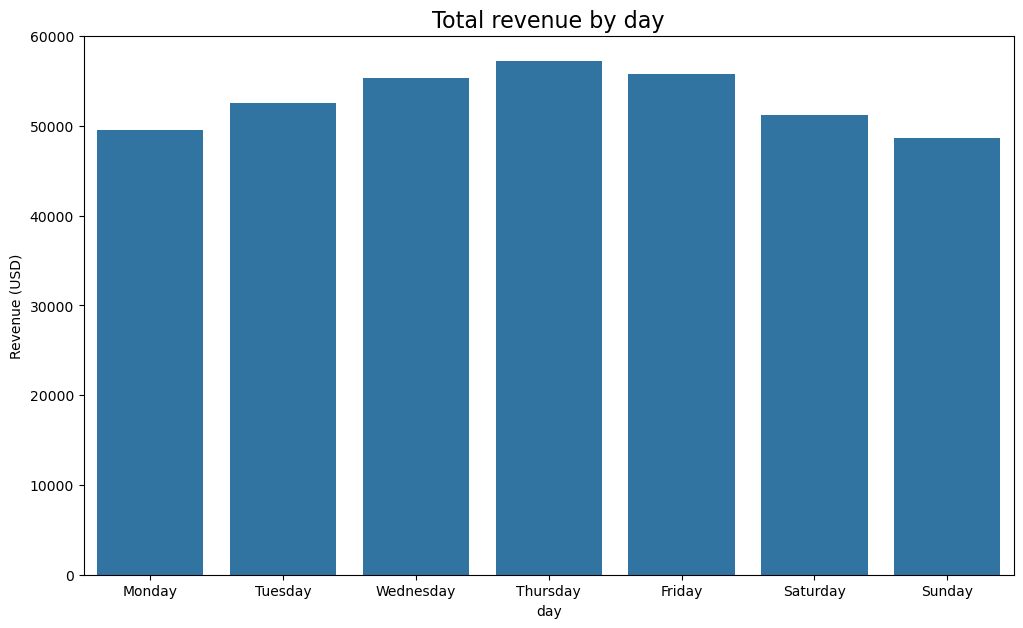

In [79]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

In [80]:
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


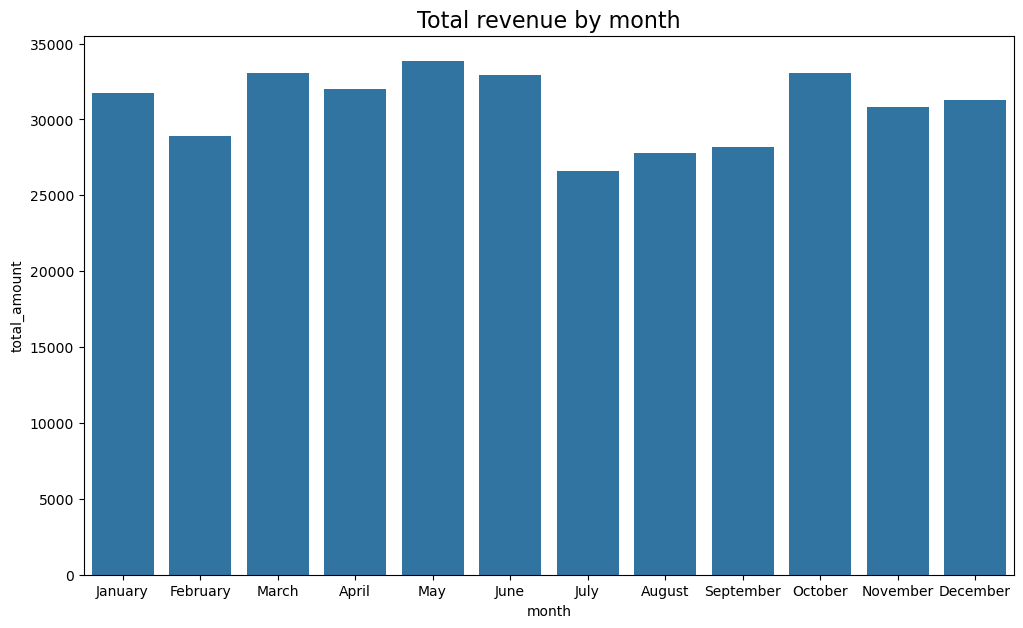

In [81]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

In [82]:
df['DOLocationID'].nunique()

216

In [84]:
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


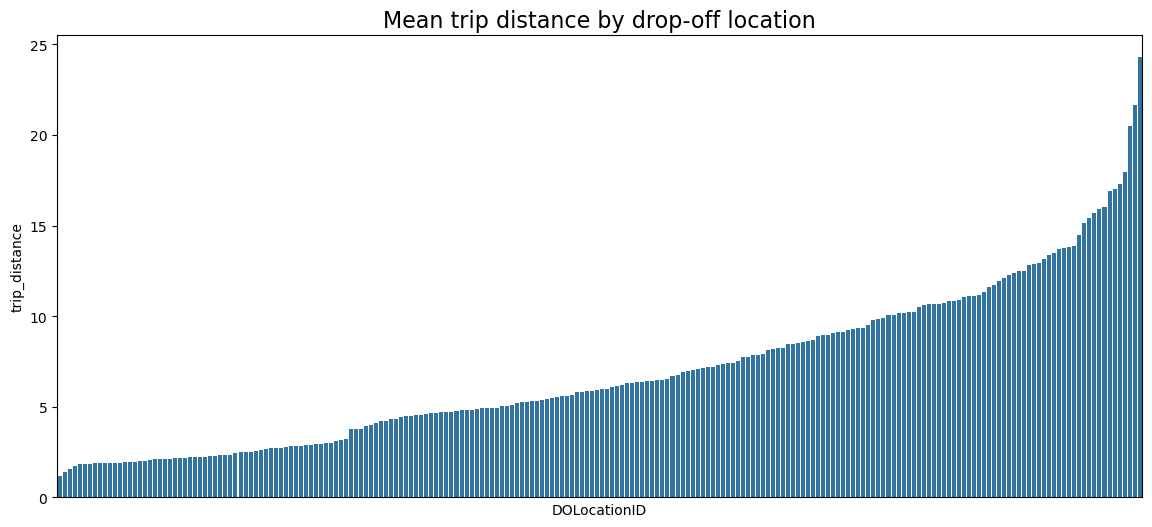

In [85]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);